In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv', encoding='latin1')

df.head()


In [6]:
df.describe()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Distribution of Content Types:


,Count,Percentage
type,,
Movie,6132,69.61%
TV Show,2677,30.39%


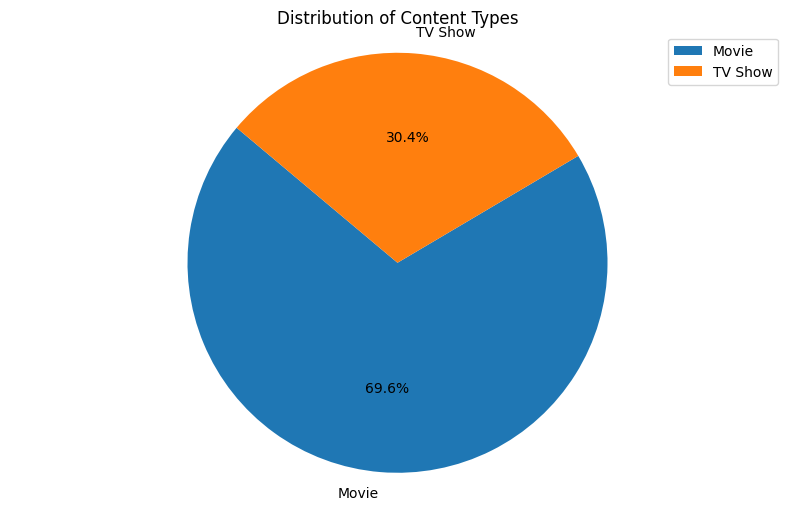

In [100]:
type_counts = df['type'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Distribution of Content Types')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.legend(type_counts.index, loc="upper right")

type_counts = df['type'].value_counts()
type_percentage = type_counts / type_counts.sum() * 100
type_counts_df = pd.DataFrame({'Count': type_counts, 'Percentage': type_percentage})
type_counts_df_formatted = type_counts_df.style.format({'Count': '{:.0f}', 'Percentage': '{:.2f}%'})
print("Distribution of Content Types:")
display(type_counts_df_formatted)

plt.show()


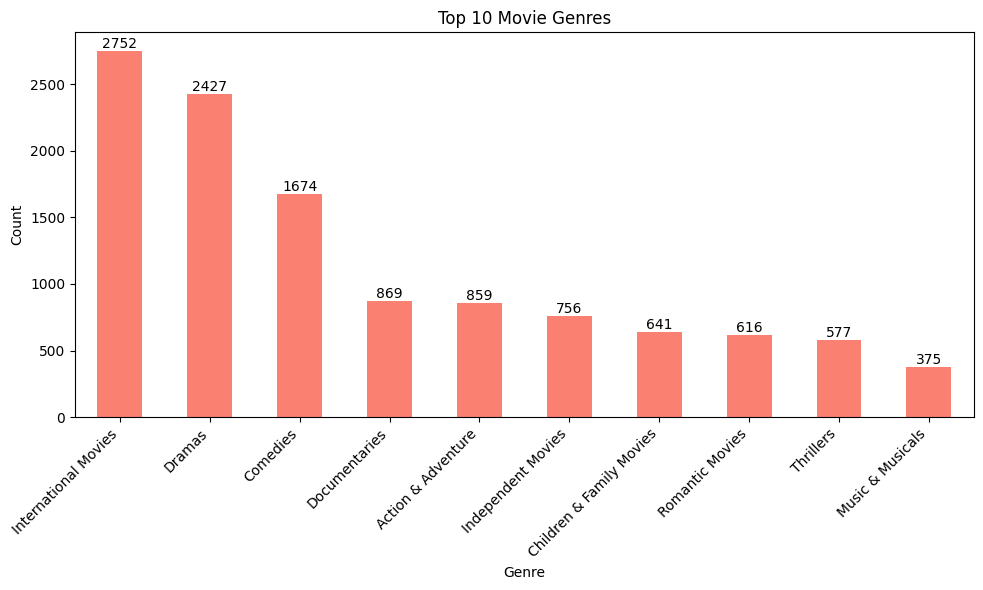

In [101]:
genres = df[df['type'] == 'Movie']['listed_in'].str.split(', ')
genres_flat = [genre for sublist in genres for genre in sublist]
genres_series = pd.Series(genres_flat)

top_genres = genres_series.value_counts().head(10)

plt.figure(figsize=(10, 6))
bar_plot = top_genres.plot(kind='bar', color='salmon')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  

for index, value in enumerate(top_genres):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout() 
plt.show()


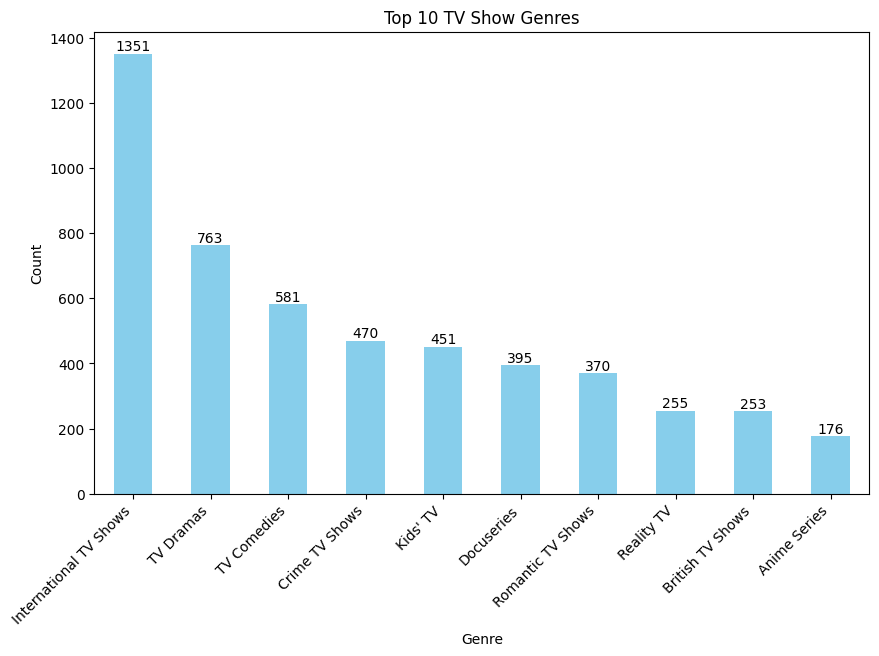

In [103]:
tv_genres = df[df['type'] == 'TV Show']['listed_in'].str.split(', ')
tv_genres_flat = [genre for sublist in tv_genres for genre in sublist]
tv_genres_series = pd.Series(tv_genres_flat)
top_tv_genres = tv_genres_series.value_counts().head(10)

plt.figure(figsize=(10, 6))
bar_plot = top_tv_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 TV Show Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45 , ha='right')

for index, value in enumerate(top_tv_genres):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


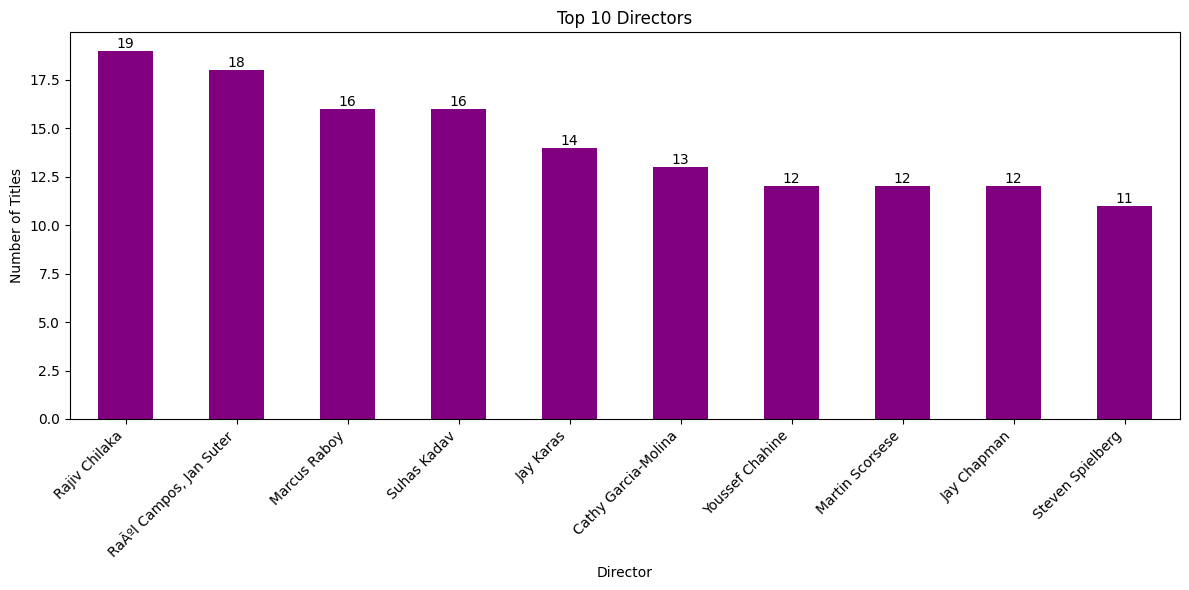

In [104]:
director_counts = df['director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = director_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{int(bar.get_height())}',
             ha='center', 
             va='bottom')

plt.tight_layout() 
plt.show()


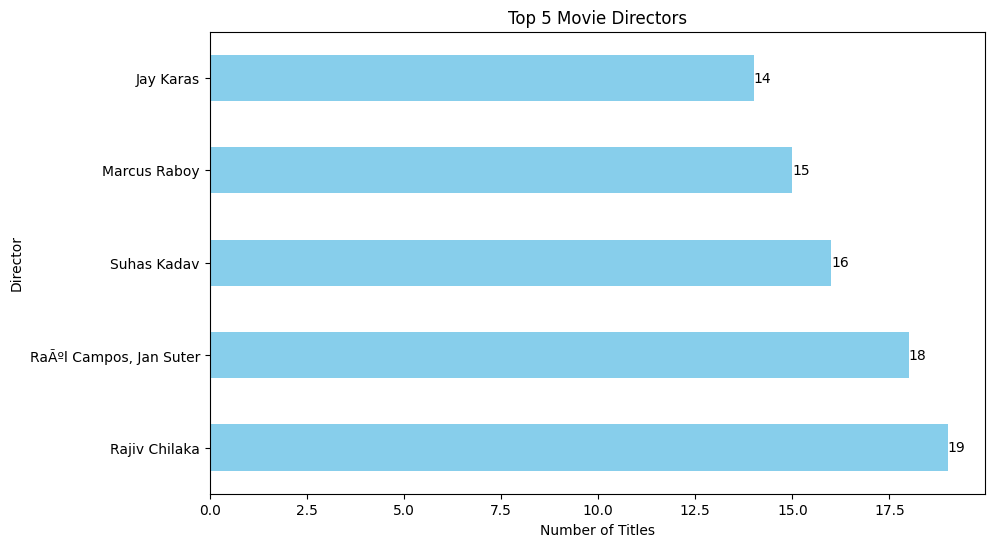

In [105]:
movies_df = df[df['type'] == 'Movie']
director_counts = movies_df['director'].value_counts().head(5)

plt.figure(figsize=(10, 6))
bar_plot = director_counts.plot(kind='barh', color='skyblue')  # Horizontal bar chart
plt.title('Top 5 Movie Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')

for index, value in enumerate(director_counts):
    plt.text(value, index, str(value), ha='left', va='center')

plt.show()


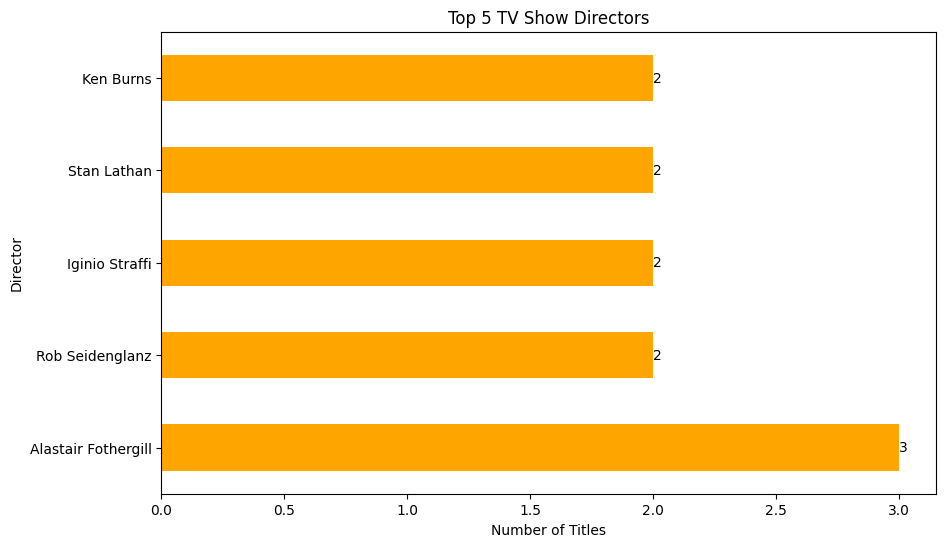

In [106]:
tv_shows_df = df[df['type'] == 'TV Show']
director_counts = tv_shows_df['director'].value_counts().head(5)

plt.figure(figsize=(10, 6))
bar_plot = director_counts.plot(kind='barh', color='orange')  # Horizontal bar chart
plt.title('Top 5 TV Show Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')

for index, value in enumerate(director_counts):
    plt.text(value, index, str(value), ha='left', va='center')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


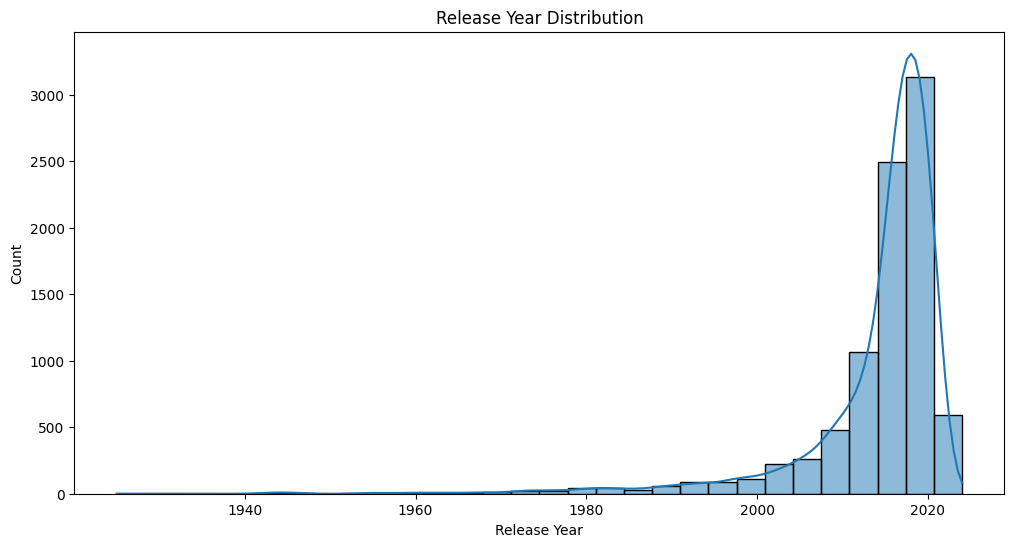

In [107]:
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

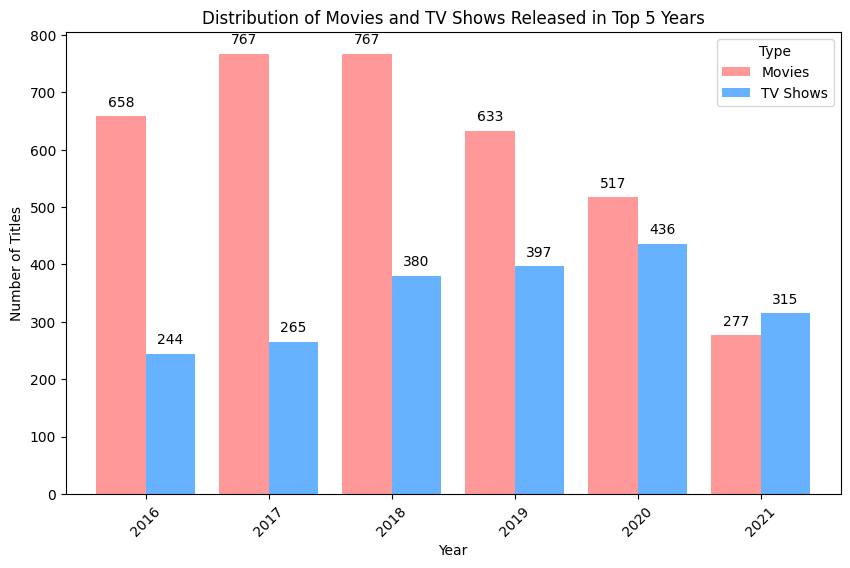

In [69]:
top_movie_years = df[df['type'] == 'Movie']['release_year'].value_counts().head(5).index.tolist()
top_tv_years = df[df['type'] == 'TV Show']['release_year'].value_counts().head(5).index.tolist()
top_years = list(set(top_movie_years + top_tv_years))

df_top_years = df[df['release_year'].isin(top_years)]

yearly_counts = df_top_years.groupby(['release_year', 'type']).size().unstack(fill_value=0)
colors = ['#FF9999', '#66B2FF']  
ax = yearly_counts.plot(kind='bar', figsize=(10, 6), color=colors, width=0.8)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Movies and TV Shows Released in Top 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type', labels=['Movies', 'TV Shows'])
plt.show()


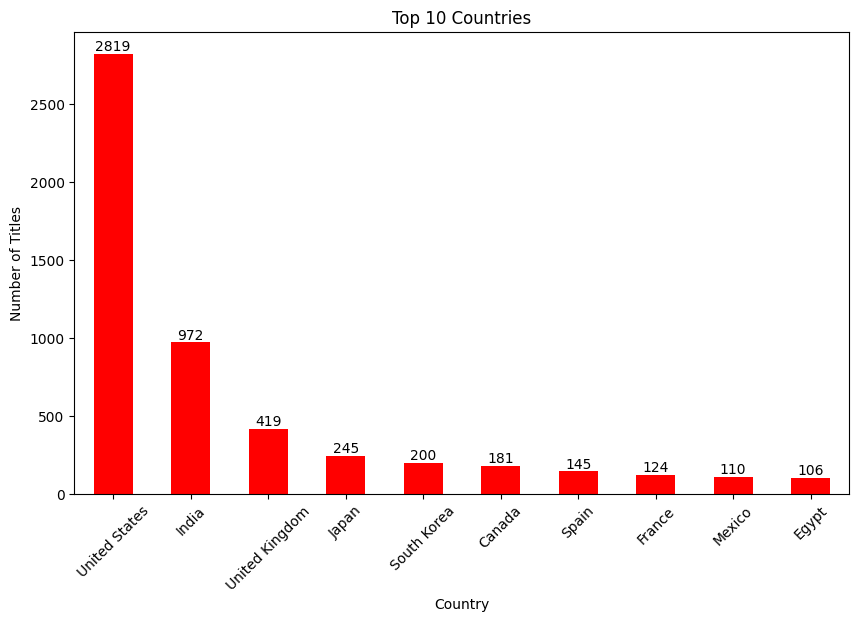

In [71]:
plt.figure(figsize=(10, 6))
ax = country_counts.plot(kind='bar', color='red')
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)

for i, count in enumerate(country_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


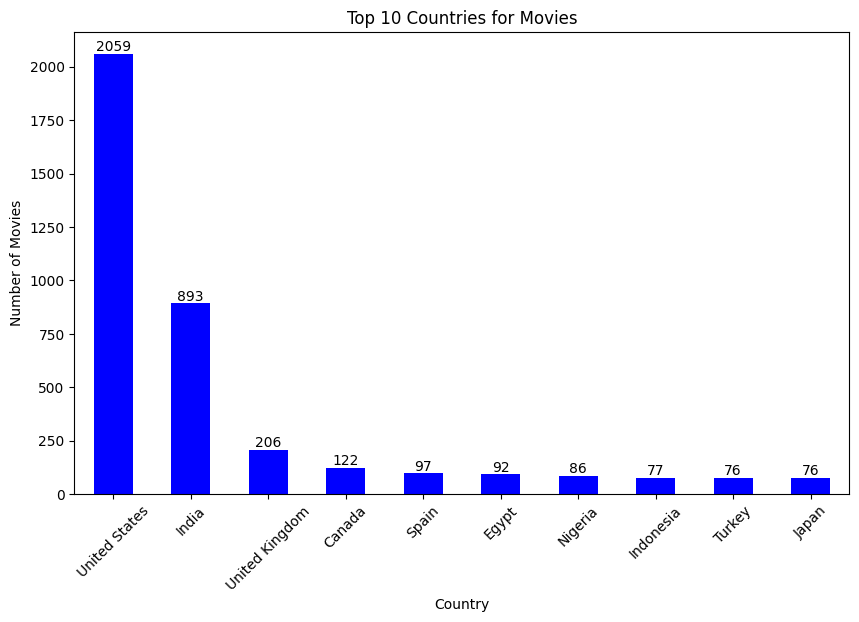

In [72]:
movie_countries_counts = df[df['type'] == 'Movie']['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = movie_countries_counts.plot(kind='bar', color='blue')
plt.title('Top 10 Countries for Movies')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

for i, count in enumerate(movie_countries_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


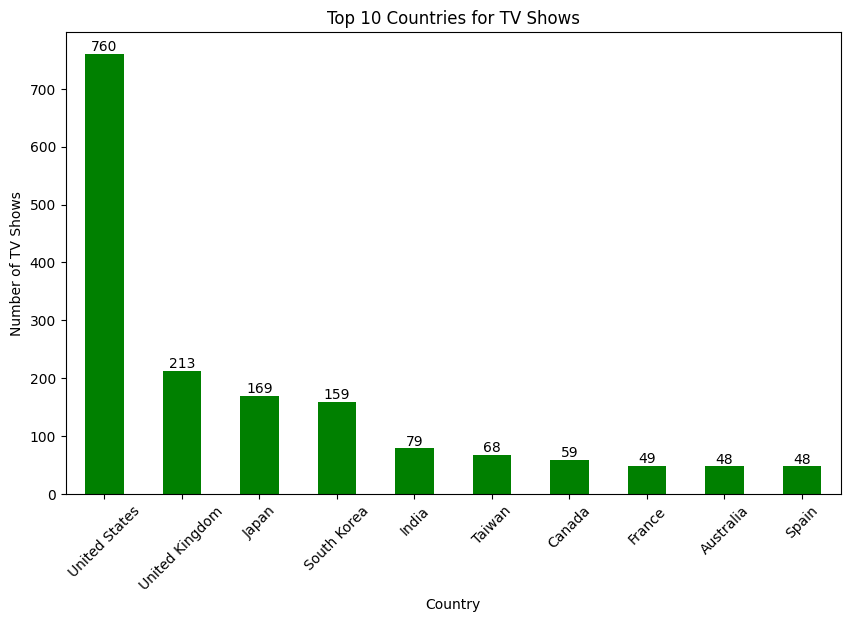

In [73]:
tv_countries_counts = df[df['type'] == 'TV Show']['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = tv_countries_counts.plot(kind='bar', color='green')
plt.title('Top 10 Countries for TV Shows')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)

for i, count in enumerate(tv_countries_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


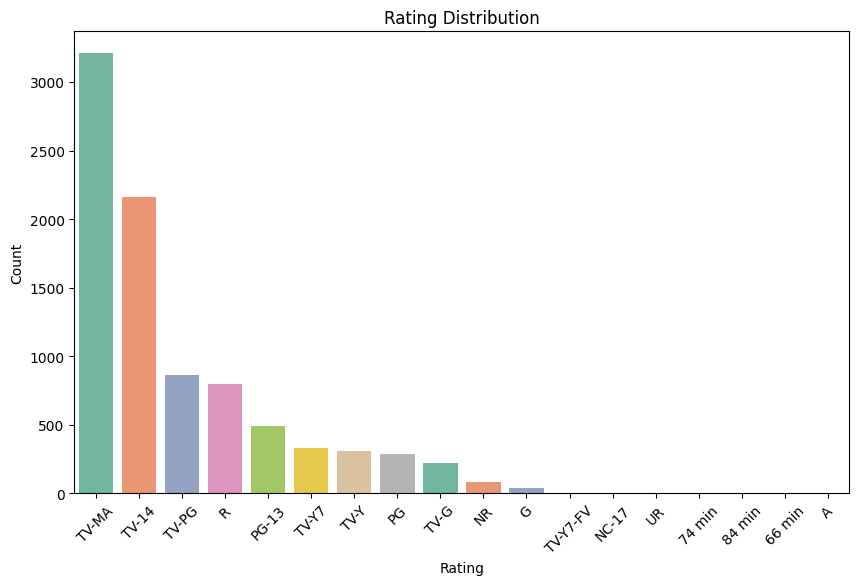

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set2')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


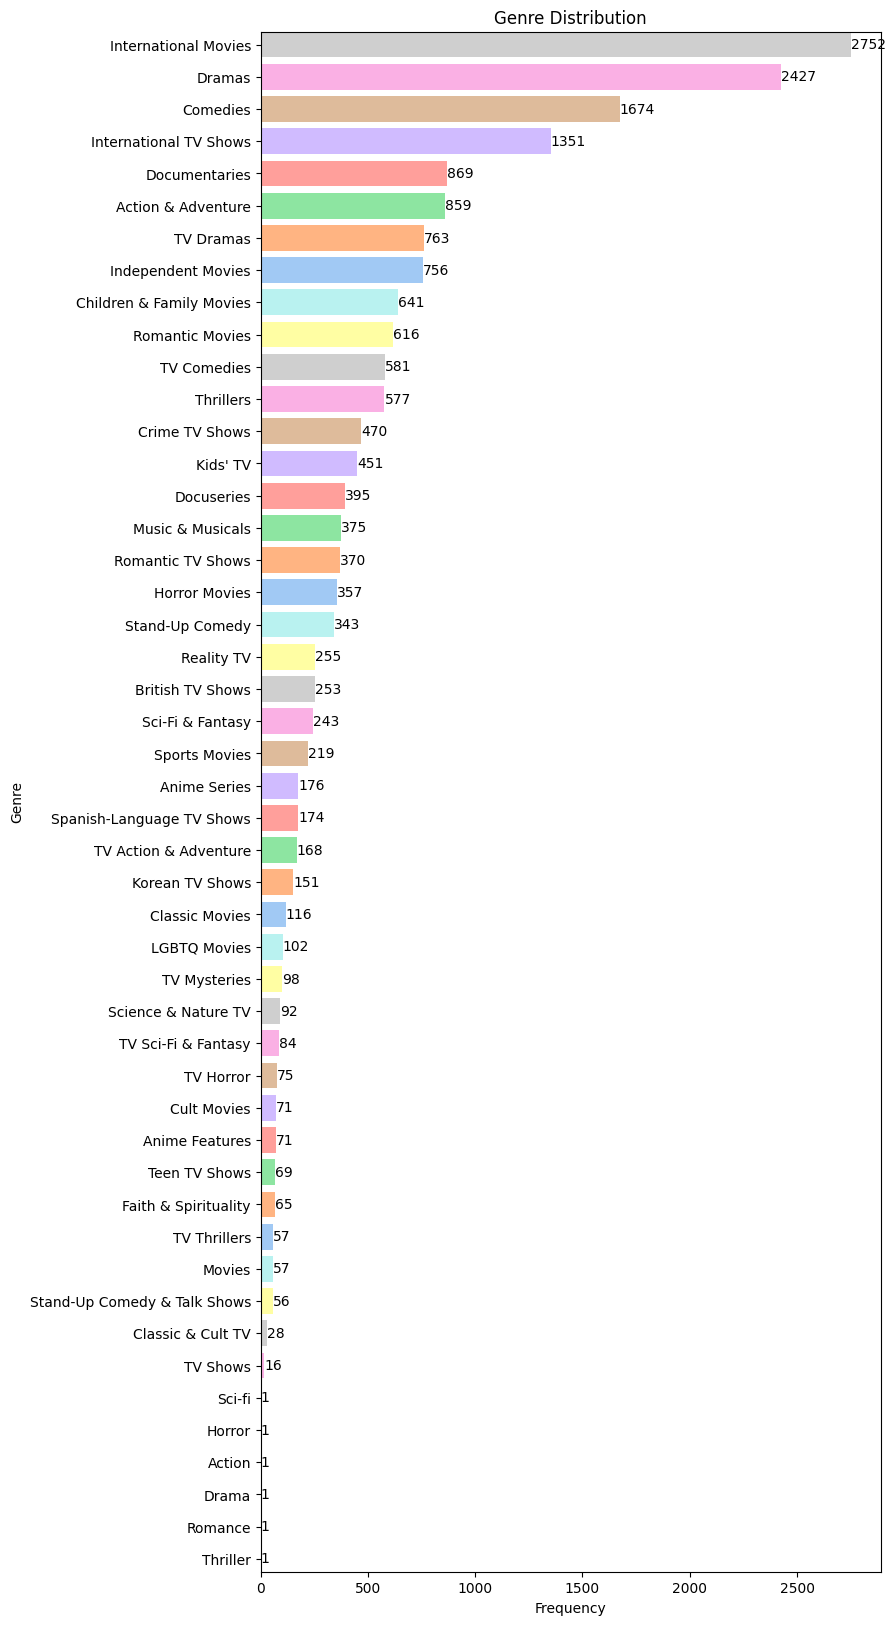

In [108]:
genres = df['listed_in'].str.split(', ')
genres_flat = [genre.strip() for sublist in genres for genre in sublist]
genres_series = pd.Series(genres_flat)
genre_counts = genres_series.value_counts()
colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 20))
bars = plt.barh(genre_counts.index[::-1], genre_counts.values[::-1], color=colors)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), 
             va='center', ha='left')

plt.margins(y=0)
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Genre Distribution')
plt.show()
